In [1]:
import pandas as pd
import numpy as np
import os
import re
from copy import deepcopy 

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
base_dir = 'data/english_only/prompting_results_clean/with_metrics/' #experiment 1
#base_dir = 'data/english_only/100k_results/with_metrics' #experiment 2

In [3]:
from aggregate_metrics_helper import *

In [4]:
os.chdir('/shared/0/projects/research-jam-summer-2024/')
pd.options.mode.copy_on_write = True

In [79]:
os.listdir('data/english_only/100k_results/')

['100k_results_raw',
 'wildchat_subset_en_100k_Mistral-Large-Instruct.jsonl',
 'with_metrics',
 'wildchat_subset_en_100k_Mixtral-8x7B.jsonl',
 'wildchat_subset_en_100k_Llama-3.1-70B.jsonl']

In [5]:
for f in os.listdir(base_dir):
    if f.startswith('wildchat_subset_en_2k_prompting') and not f.endswith('_end.jsonl') and not f.endswith('_embeddings.npz') and not f.endswith('lexical.jsonl') and not f.endswith('MERGED.jsonl') and not f.endswith('_POS_DEP.jsonl'):
        print(f)

wildchat_subset_en_2k_prompting_Qwen2-72B-Instruct.jsonl
wildchat_subset_en_2k_prompting_c4ai-command-r-v01.jsonl
wildchat_subset_en_2k_prompting_Mixtral-8x7B-Instruct-v0.1.jsonl
wildchat_subset_en_2k_prompting_Meta-Llama-3-70B-Instruct.jsonl
wildchat_subset_en_2k_prompting_Mistral-Large-Instruct.jsonl
wildchat_subset_en_2k_prompting_Phi-3-medium-4k-instruct.jsonl
wildchat_subset_en_2k_prompting_Mistral-7B-Instruct-v0.3.jsonl
wildchat_subset_en_2k_prompting_Meta-Llama-3.1-8B-Instruct.jsonl
wildchat_subset_en_2k_prompting_Meta-Llama-3.1-70B-Instruct.jsonl


In [13]:
metrics = pd.concat([make_human_vs_llm_df(f, base_dir) for f in os.listdir(base_dir)[:2]
                       if f.startswith('wildchat_subset_en_2k_prompting') and 
                       not f.endswith('_end.jsonl') and not f.endswith('_embeddings.npz') and 
                       not f.endswith('lexical.jsonl') and not f.endswith('MERGED.jsonl') and 
                       not f.endswith('_POS_DEP.jsonl')]).reset_index(drop=True)

wildchat_subset_en_2k_prompting_Qwen2-72B-Instruct.jsonl
read metrics
read dependency parse metrics
read embeddings


In [14]:
print(metrics.shape)
print()
metrics.head()

(31815, 44)



hashed_ip  \
0  568ecf3349b46c238268f63bcdbb2e12cd88feea3052b9...   
1  d3c81b62172c8e48ca874e118ee957e3db84d1f9b4d5b1...   
2  6e9b81c31754d99e4f9df95bd6317c844f444f4eedd216...   
3  5ed67e4bf7e0054269cd7281f76a05f7fa75bf36856ea7...   
4  c29121a61bae1319376607d7a8475b8a7339ee288fa66c...   

                                               model  \
0  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...   
1  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...   
2  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...   
3  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...   
4  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...   

                  conversation_hash    prompt  human_perplexity  \
0  231dc924f9bf607871bf3e5699930833  Prompt_1        158.865589   
1  edf58f8e33a00f9c374d448aad703650  Prompt_1         26.437630   
2  544d60f14b495ca7e7ae9dbe2ed63220  Prompt_1         64.936443   
3  1f63b7d1807287f1d1ecfb8710075789  Prompt_1         45.380340   
4  245490794224427cf7c4be8fdba35f8c  Prompt_1          6.070055   

   llm_perplexity  human_subjectivity  llm_subjectivity  \
0       42.382804        6.000000e-01      5.500000e-01   
1       17.138431        1.000000e-10      7.250000e-01   
2       42.698814        7.272727e-01      6.250000e-01   
3       58.248050        5.000000e-01      5.400000e-01   
4       14.332415        5.187500e-01      1.000000e-10   

                                          human_liwc  human_politeness  ...  \
0  {'achieve': 0.0, 'affect': 0.0, 'anger': 0.0, ...          0.120022  ...   
1  {'achieve': 0.0, 'affect': 0.0, 'anger': 0.0, ...          0.984959  ...   
2  {'achieve': 0.0, 'affect': 0.0, 'anger': 0.0, ...          0.607415  ...   
3  {'achieve': 0.0, 'affect': 0.0487804878, 'ange...          0.751625  ...   
4  {'achieve': 0.0461538462, 'affect': 0.15384615...          0.480610  ...   

   human_dep_dpth  human_dep_brth  human_dep_dep_dist llm_dep_dpth  \
0               2               5            2.222222            4   
1               4               3            1.375000            8   
2               7               4            1.516129            6   
3               7              10            2.643836            4   
4              10              18            3.044321            4   

   llm_dep_brth  llm_dep_dep_dist  \
0             5          1.296296   
1             6          1.415584   
2             5          1.521739   
3             8          1.872340   
4             6          1.573333   

                                         human_sbert  \
0  [0.058730680495500565, -0.027935944497585297, ...   
1  [0.016433479264378548, -0.010125488974153996, ...   
2  [-0.04167027771472931, -0.03375384956598282, 0...   
3  [-0.04662158340215683, 0.0035614471416920424, ...   
4  [0.03154560178518295, -0.023224515840411186, -...   

                                           llm_sbert  \
0  [0.01683928444981575, 0.11676625162363052, -0....   
1  [-0.007542246486991644, -0.08430641144514084, ...   
2  [0.00025410144007764757, 0.0863824188709259, 0...   
3  [-0.06962382048368454, -0.0201204102486372, -0...   
4  [-0.01936245523393154, 0.04322631657123566, 0....   

                                          human_luar  \
0  [0.13018760085105896, 0.248081773519516, -0.19...   
1  [-0.3781570494174957, -0.3390761911869049, 0.3...   
2  [0.21861684322357178, 0.04622489586472511, -0....   
3  [-0.02591072767972946, -0.02138587459921837, -...   
4  [0.6277977228164673, 0.3861098885536194, -0.49...   

                                            llm_luar  
0  [-0.2808733284473419, -0.851929247379303, 0.34...  
1  [0.6965972185134888, -0.194828599691391, -0.06...  
2  [-0.2201990783214569, -0.31897538900375366, -0...  
3  [0.5467545986175537, 0.12464392185211182, -0.5...  
4  [0.0921144187450409, 0.22655180096626282, 0.09...  

[5 rows x 44 columns]

In [15]:
# check that columns are exactly the merge keys and human/llm metrics from all_metrics 

print(Counter(['human_'+k in metrics.columns for k in all_metrics]))
print(Counter(['llm_'+k in metrics.columns for k in all_metrics]))
print(Counter([k in metrics.columns for k in merge_keys]))
print(Counter([k in merge_keys or re.sub('human_|llm_','',k) in all_metrics 
               for k in metrics.columns]))


Counter({True: 20})
Counter({True: 20})
Counter({True: 4})
Counter({True: 44})


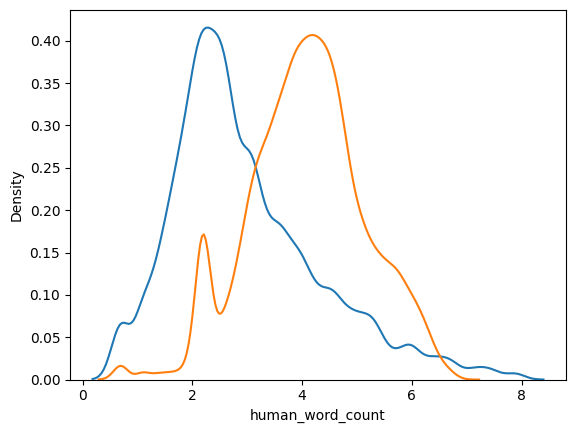

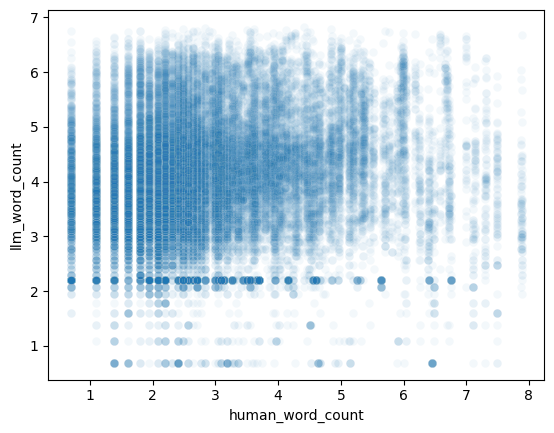

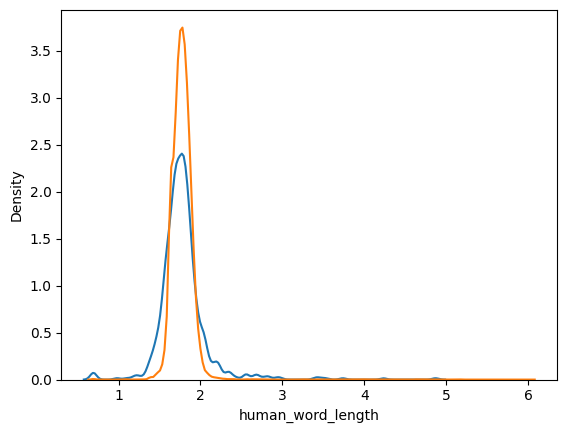

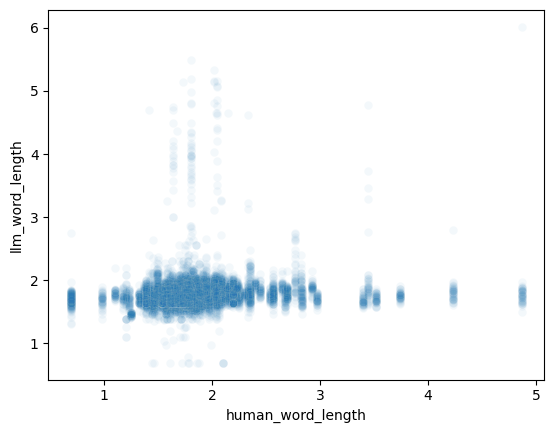

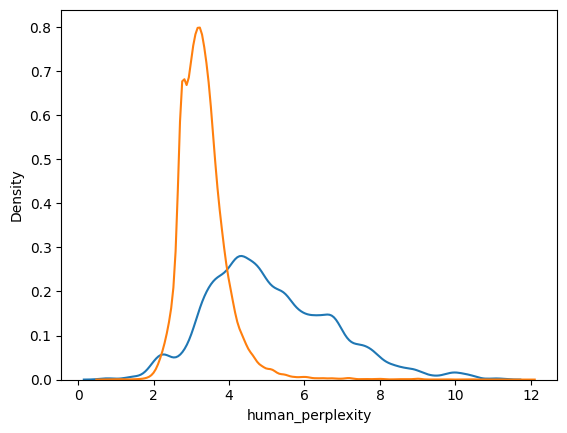

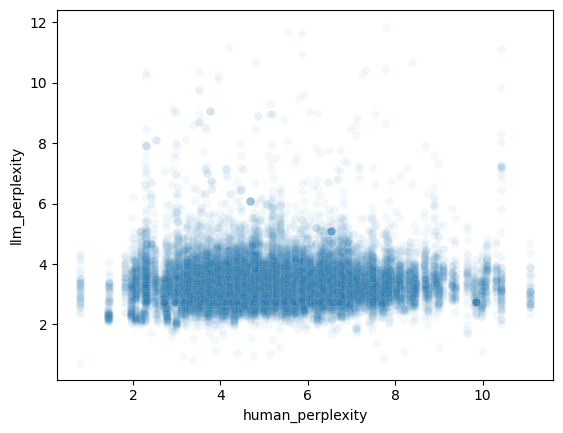

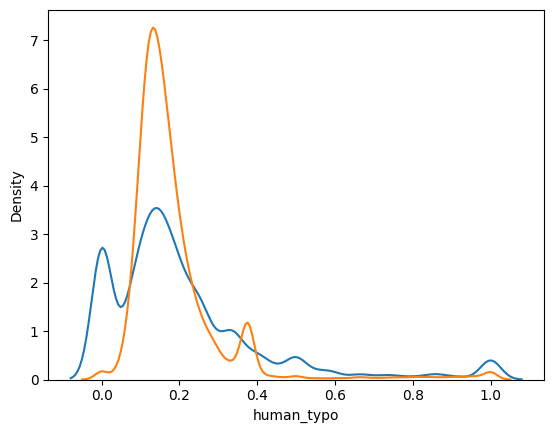

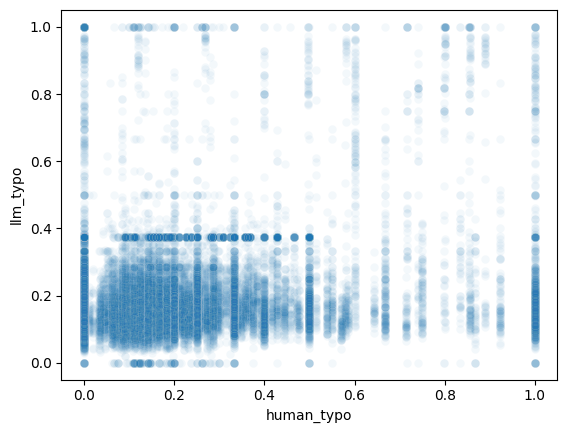

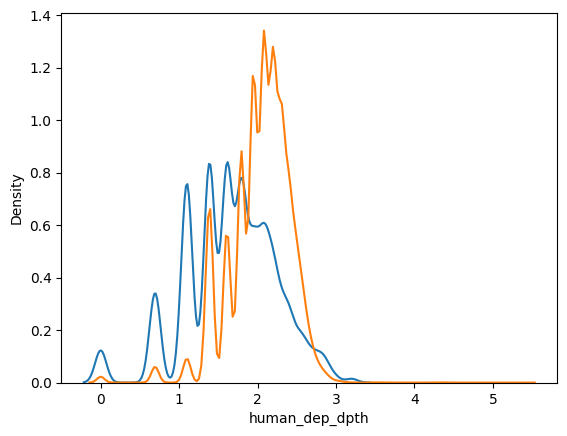

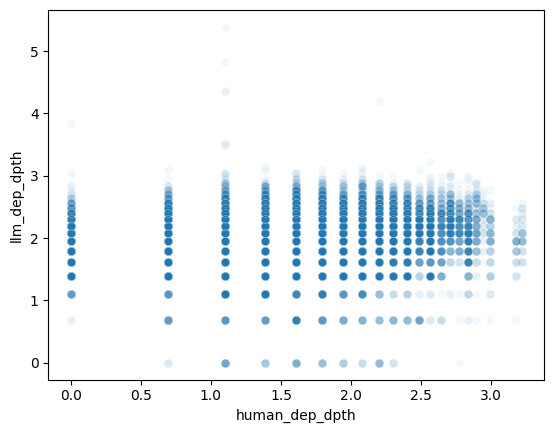

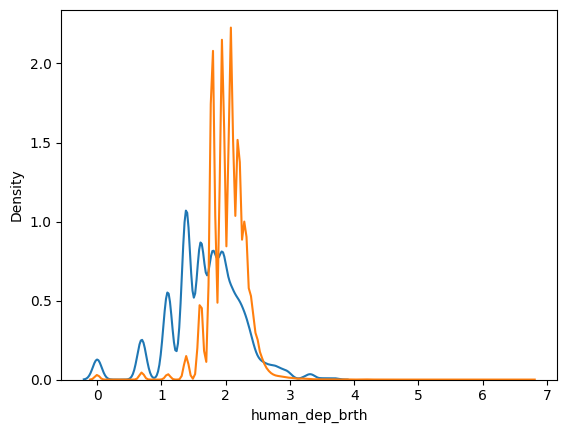

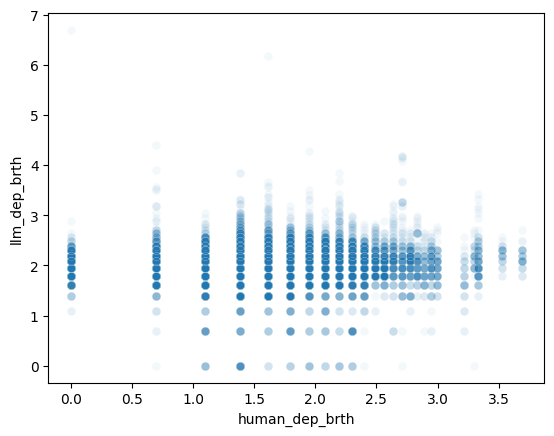

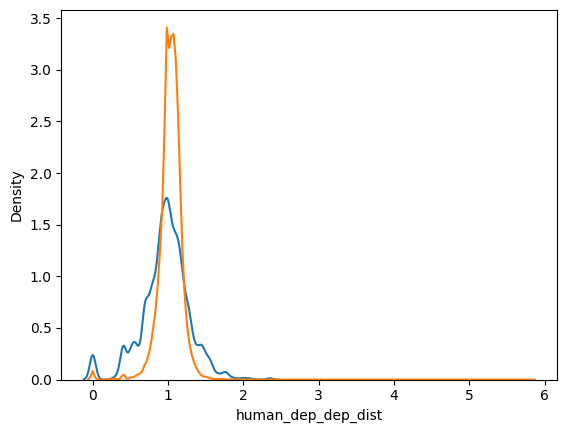

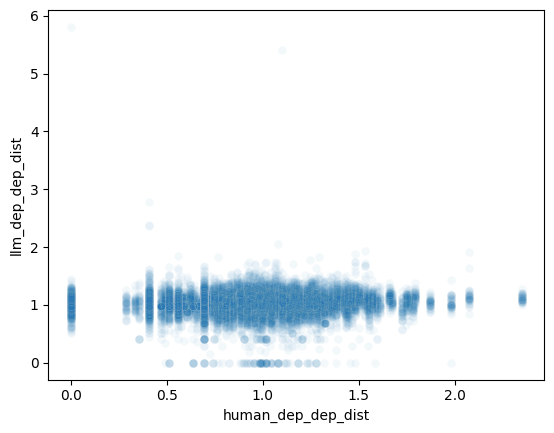

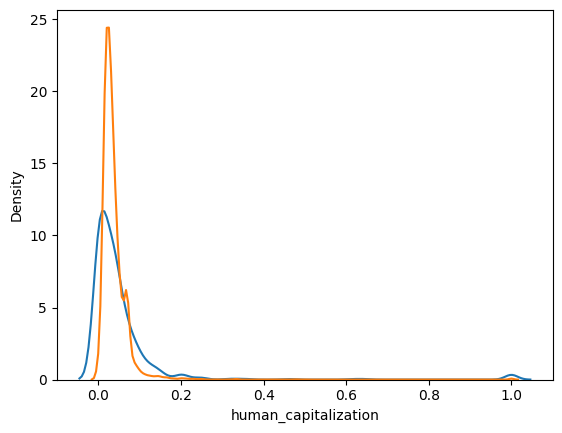

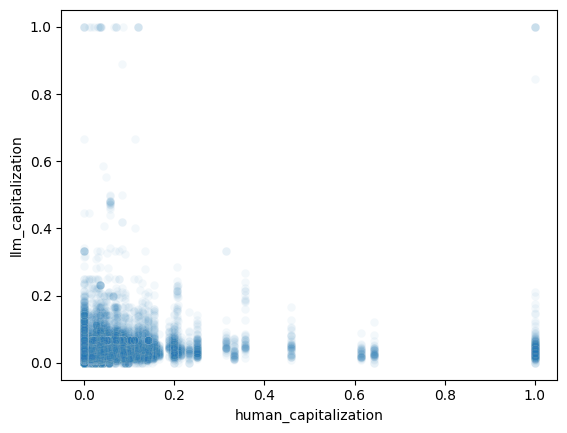

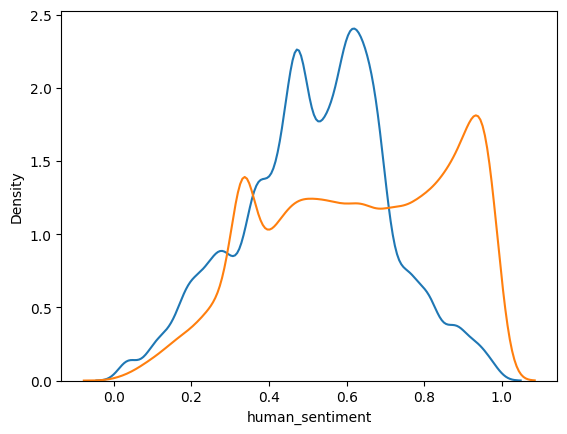

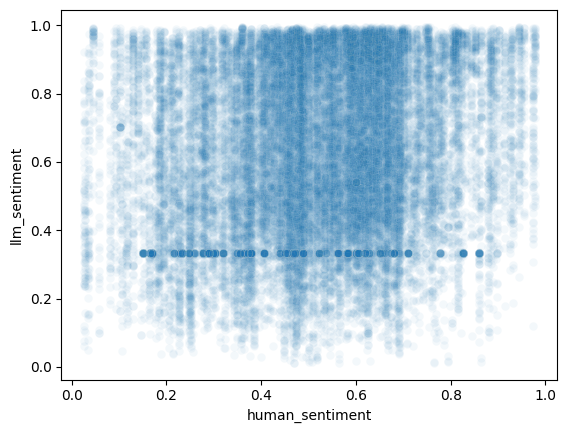

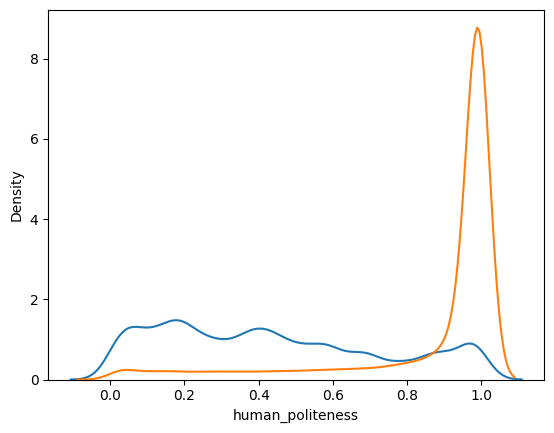

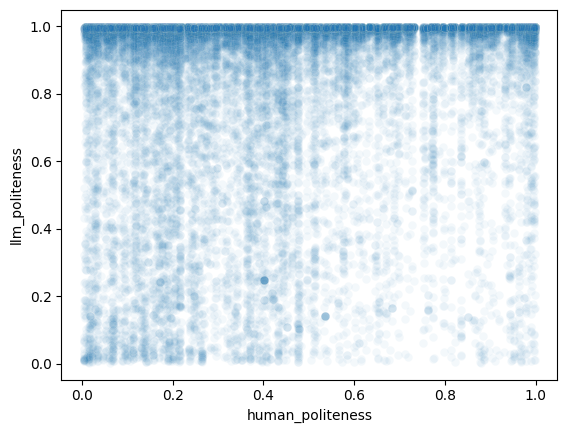

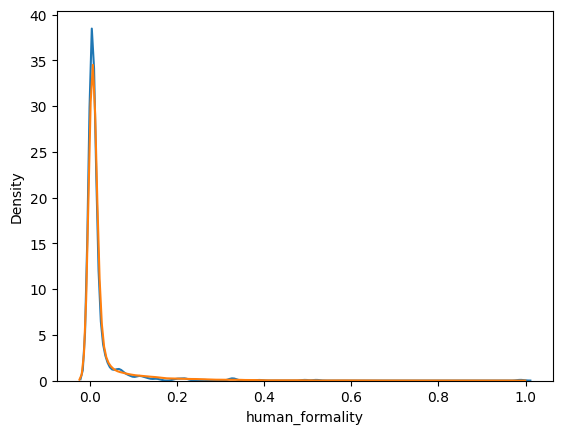

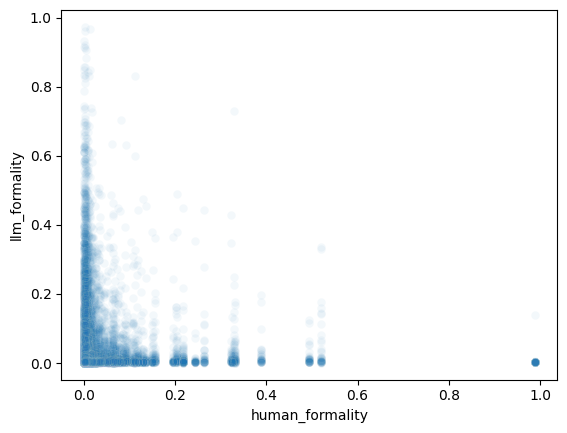

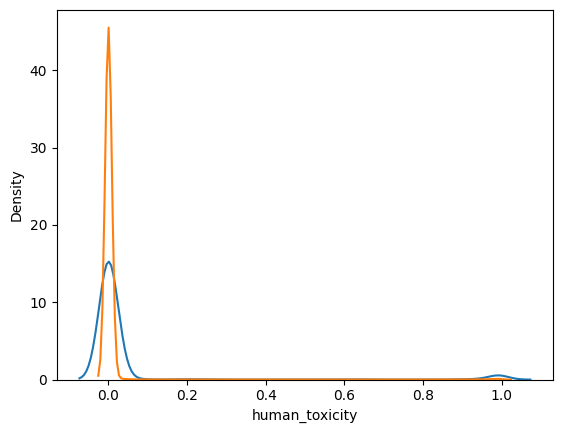

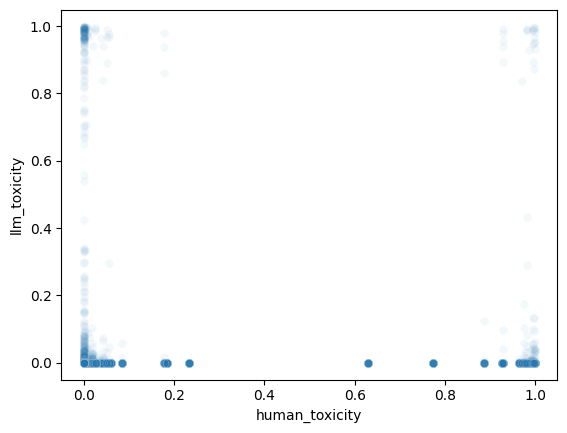

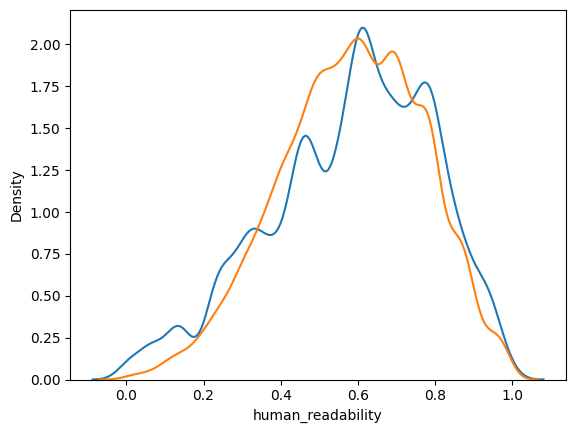

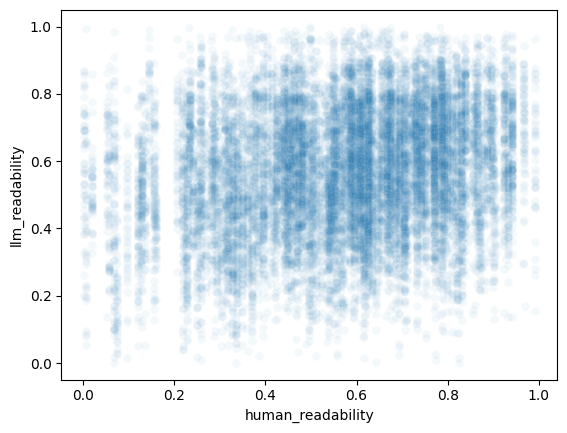

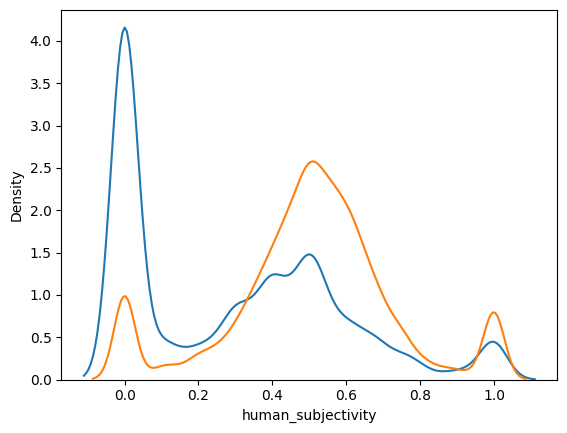

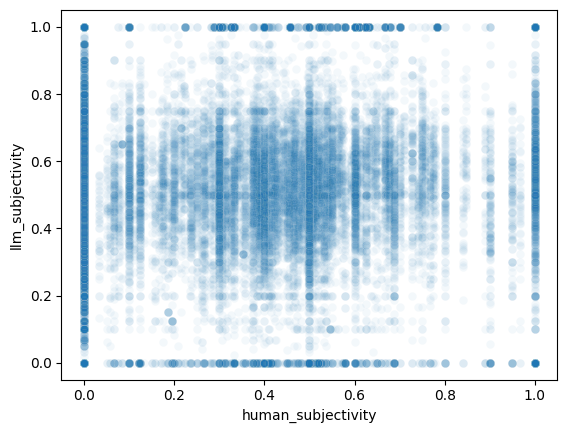

In [49]:
# plot and log transform
for k in all_metrics:
    if all_metrics[k] == 'scalar':
        sns.kdeplot(metrics['human_'+k])
        sns.kdeplot(metrics['llm_'+k])
        plt.show()
        sns.scatterplot(x = metrics['human_'+k], y = metrics['llm_'+k], alpha=0.05)
        plt.show()


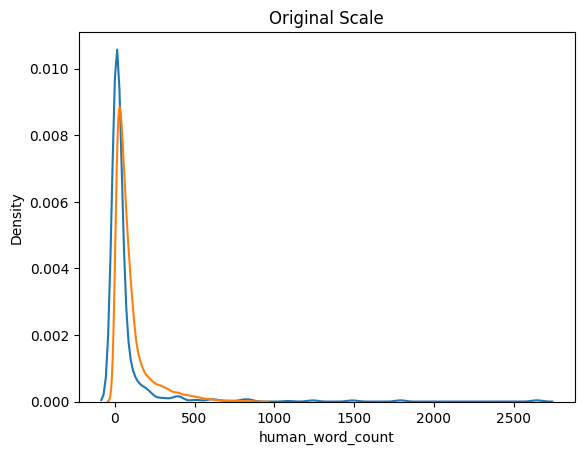

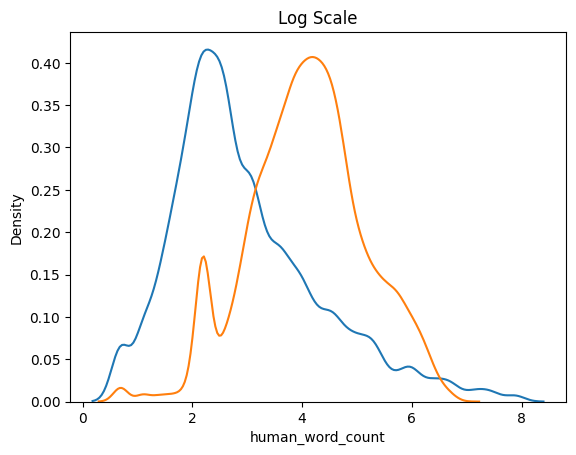

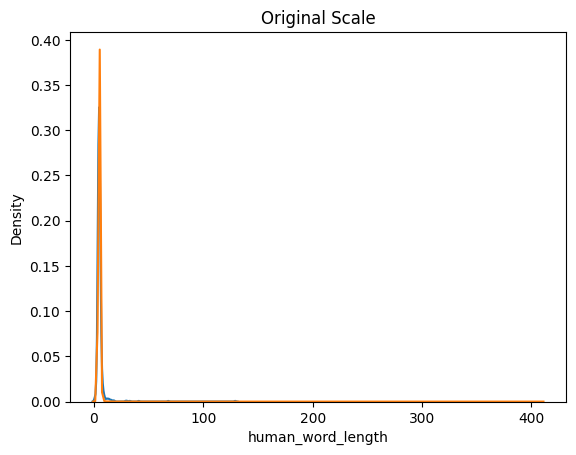

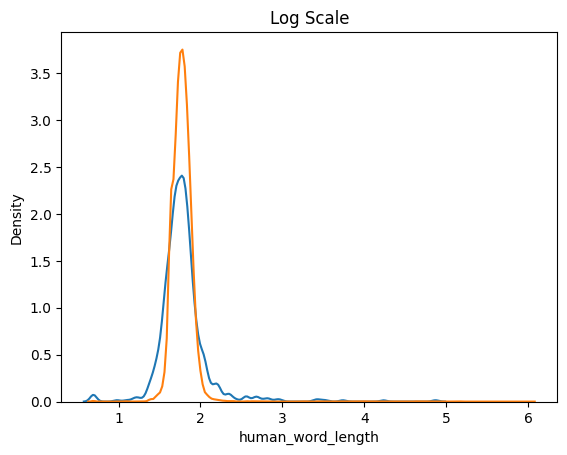

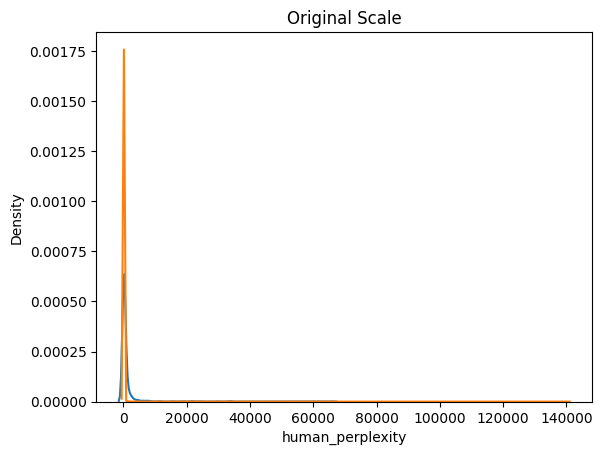

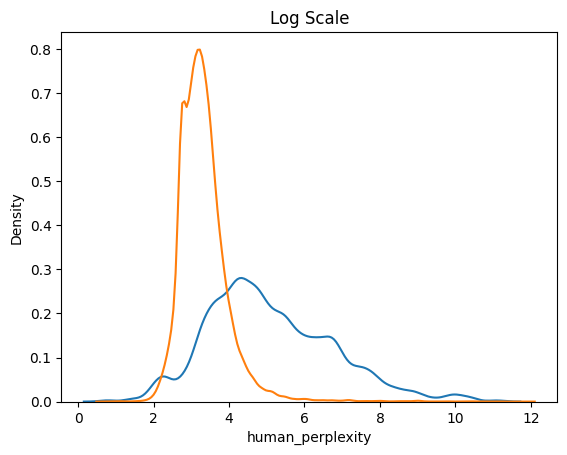

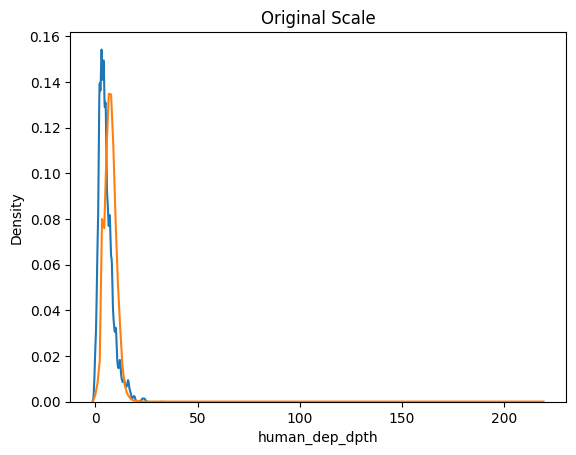

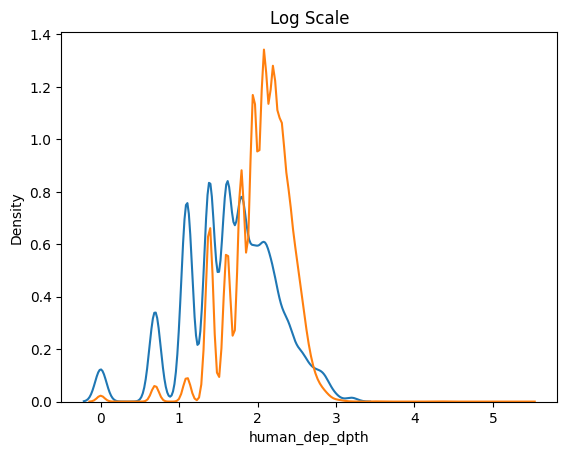

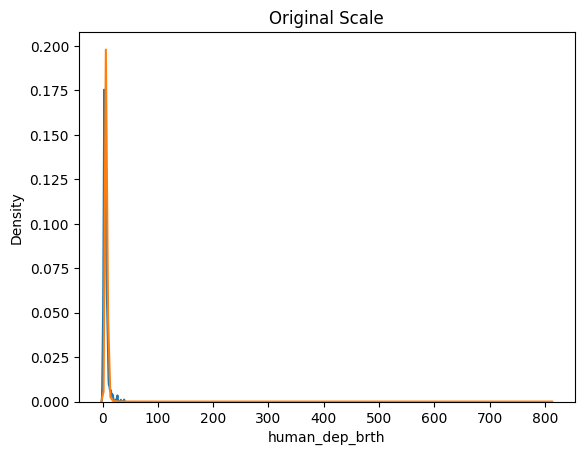

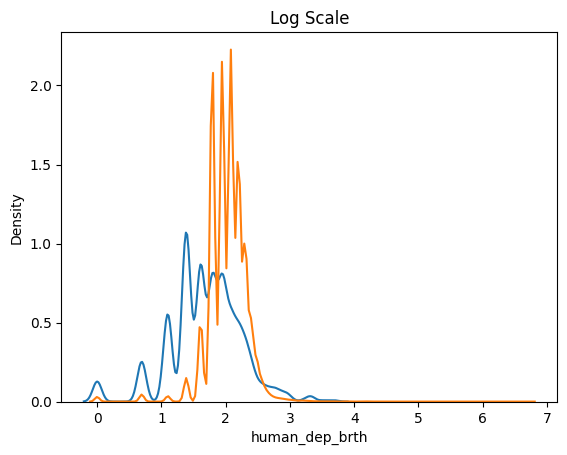

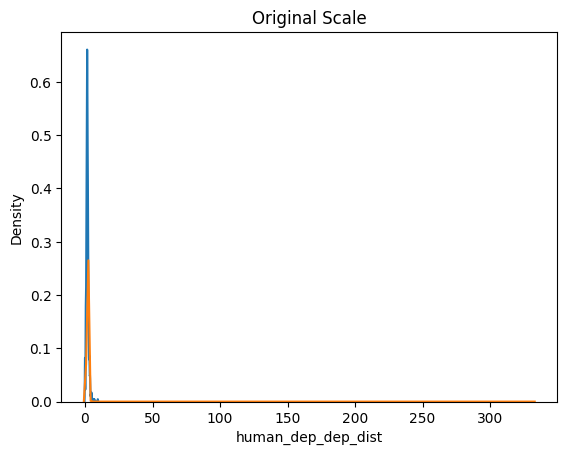

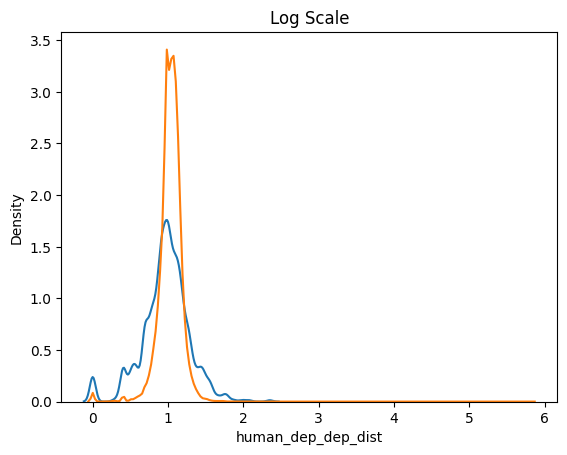

In [17]:
for k in ['word_count', 'word_length', 'perplexity', 'dep_dpth', 'dep_brth', 'dep_dep_dist']:
    if all_metrics[k] == 'scalar':
        sns.kdeplot(metrics['human_'+k])
        sns.kdeplot(metrics['llm_'+k])
        plt.title('Original Scale')
        plt.show()

        sns.kdeplot(np.log(metrics['human_'+k]+1))
        sns.kdeplot(np.log(metrics['llm_'+k]+1))
        plt.title('Log Scale')
        plt.show()


In [18]:
# log scale heavy-tailed count metrics
for k in ['word_count', 'word_length', 'perplexity', 'dep_dpth', 'dep_brth', 'dep_dep_dist']:
    metrics['human_'+k] = np.log(metrics['human_'+k]+1)
    metrics['llm_'+k] = np.log(metrics['llm_'+k]+1)

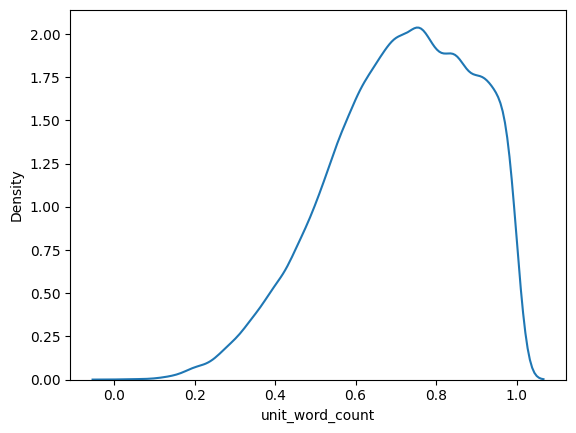

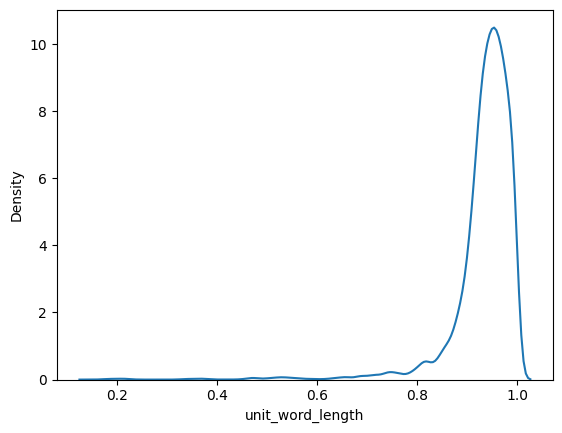

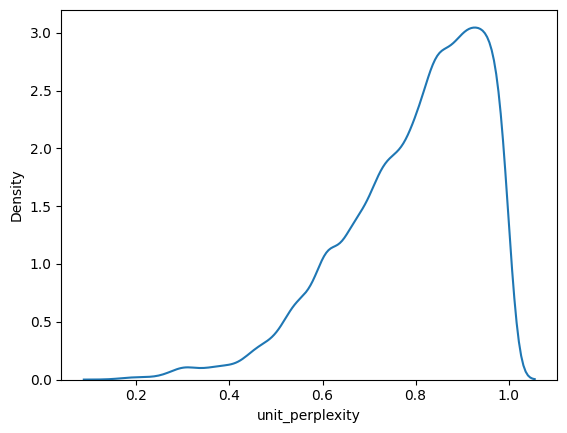

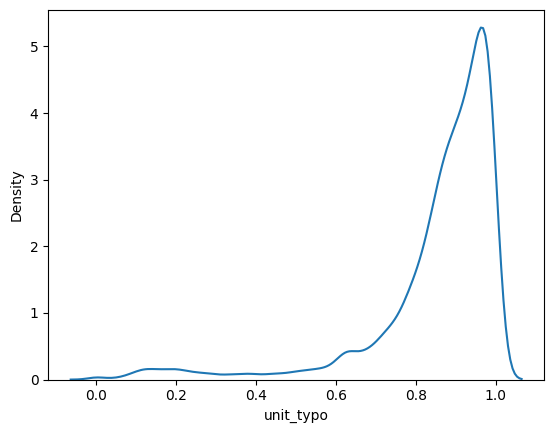

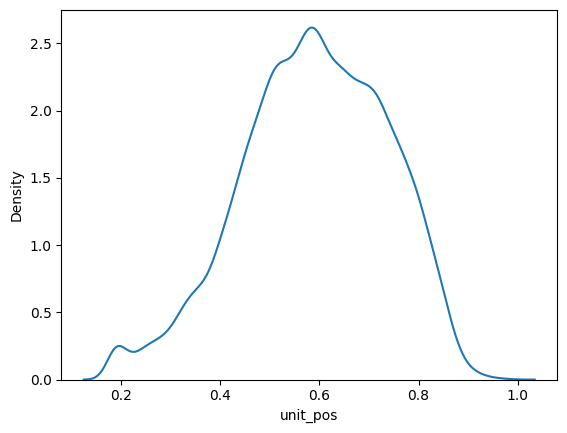

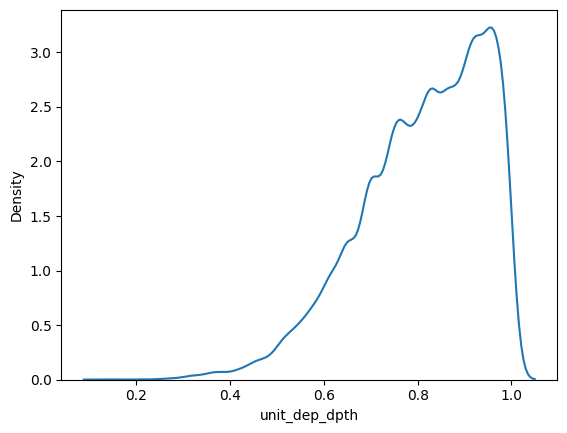

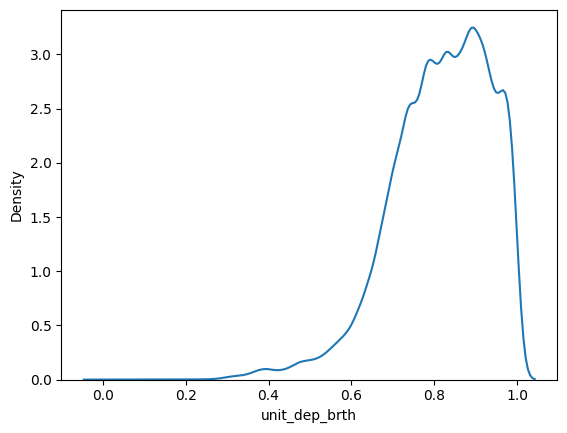

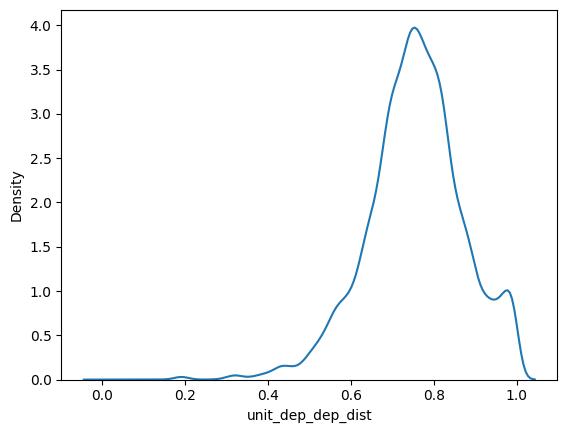

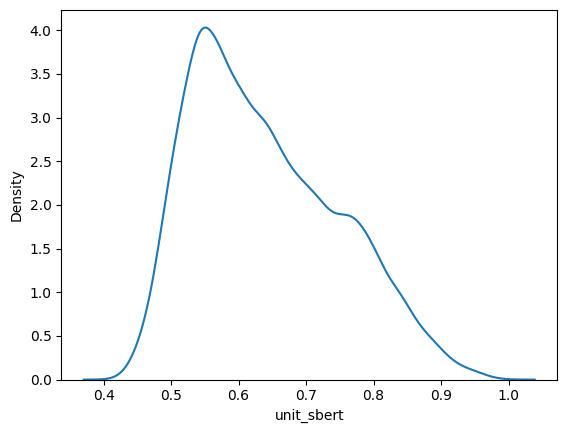

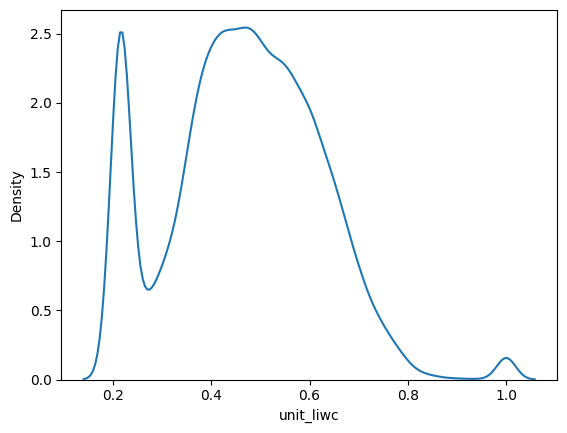

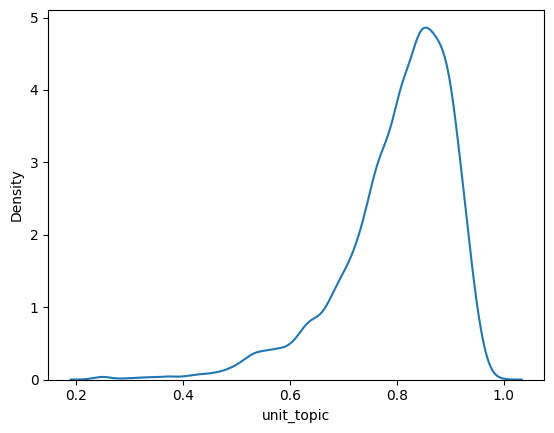

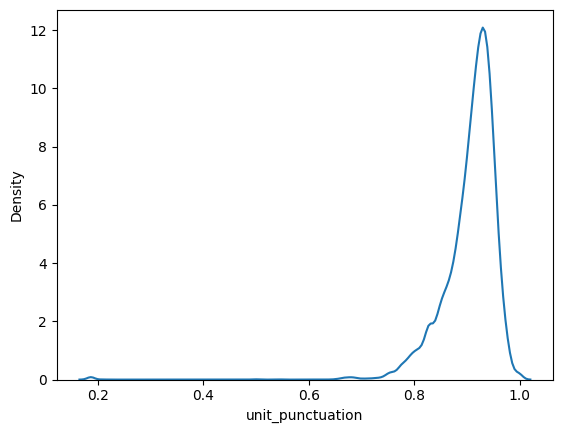

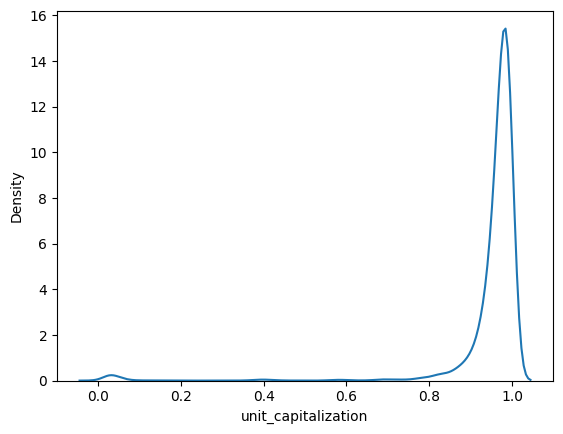

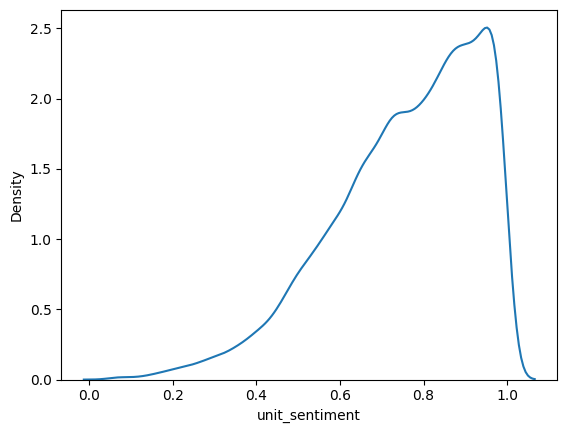

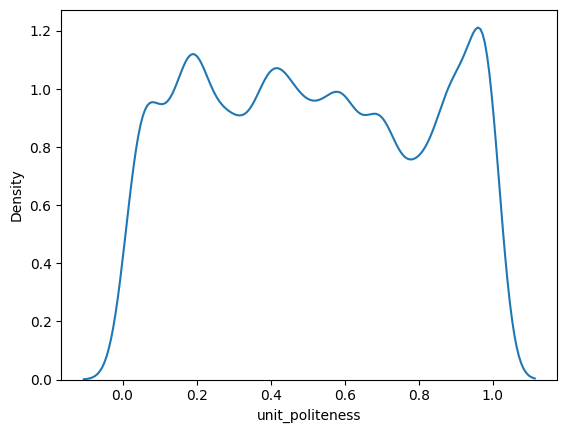

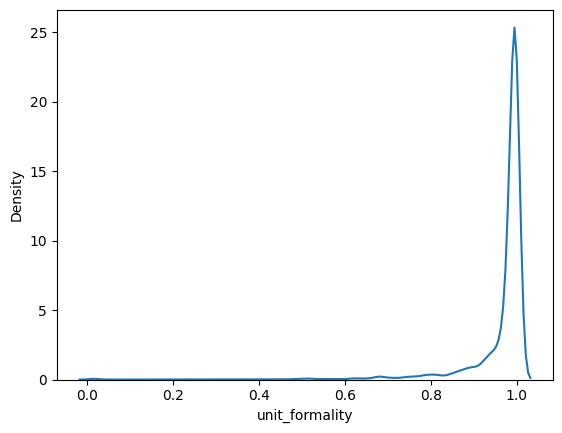

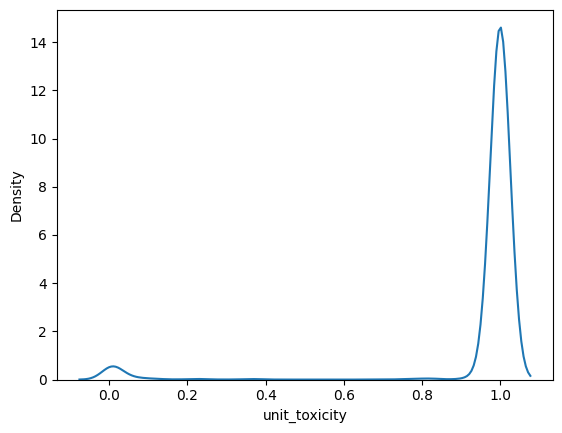

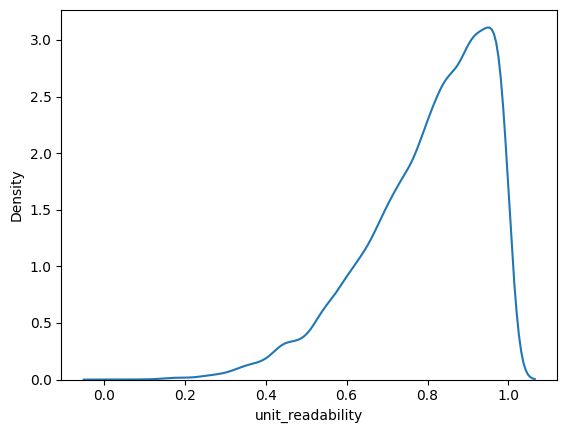

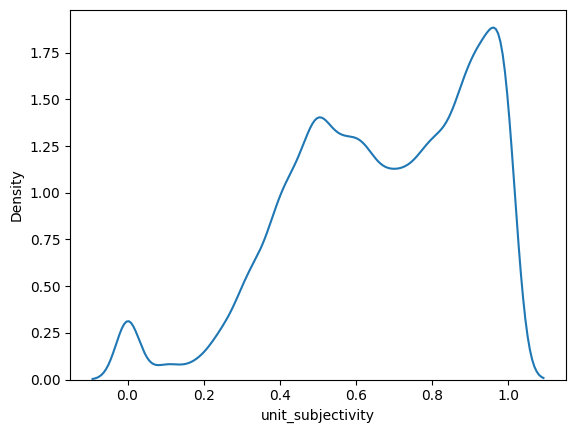

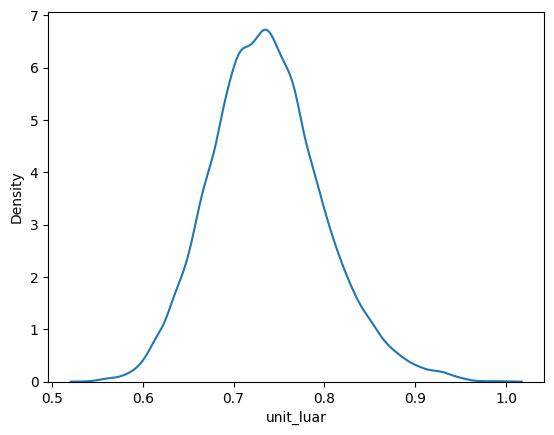

In [19]:
# CREATE NORMALIZED SIMILARITIES IN [0,1]
df_unit = metrics[merge_keys]
for k in all_metrics:
    df_unit.loc[:,'unit_'+k] = diff_unit(metrics['human_'+k], metrics['llm_'+k], all_metrics[k], 
                                         rescale = k in ['word_count', 'word_length', 'perplexity', 
                                                         'dep_dpth', 'dep_brth', 'dep_dep_dist'])
    sns.kdeplot(df_unit['unit_'+k])
    plt.show()

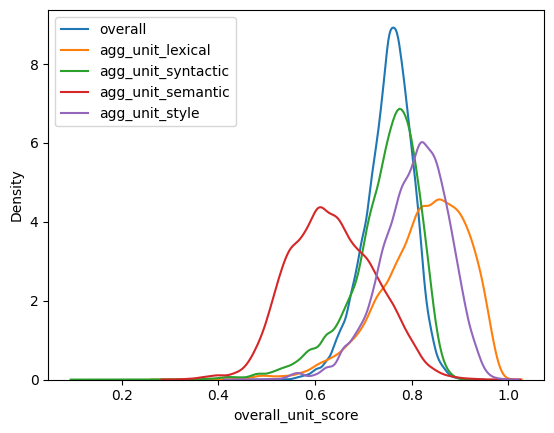

In [20]:
# AGGREGATED SCORES VIA UNIT NORMALIZATION
df_unit = aggregate_scores(df_unit, method = 'unit')

In [25]:
df_unit.to_csv('data/agg_metrics/unit_normed_metrics.csv', index=None)

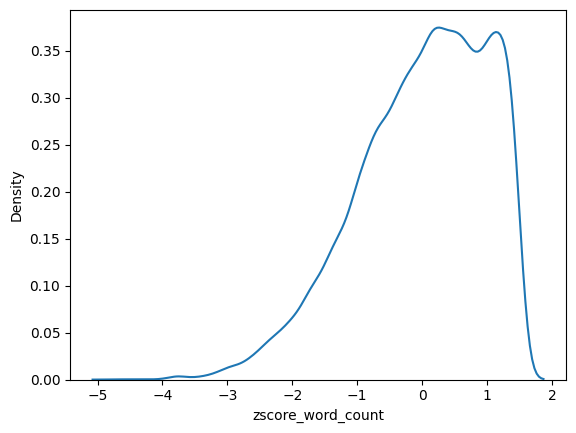

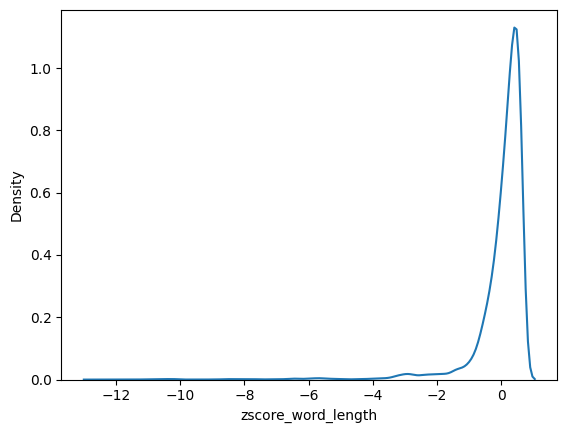

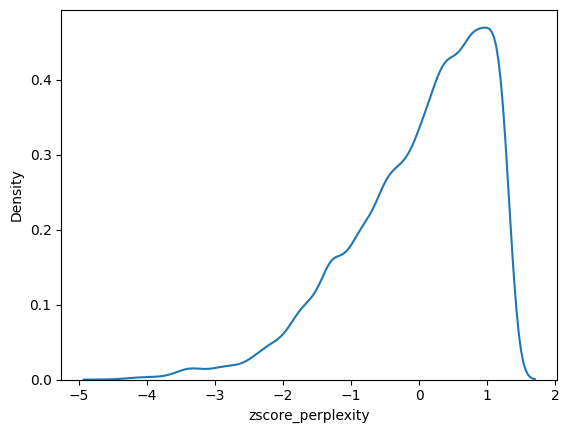

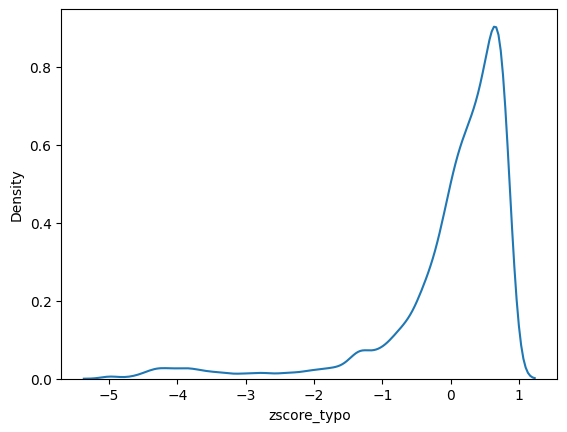

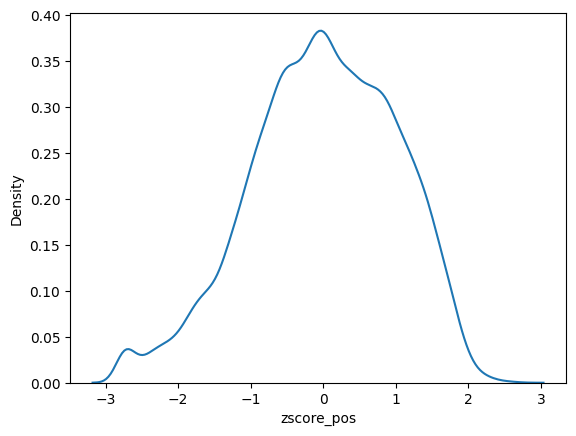

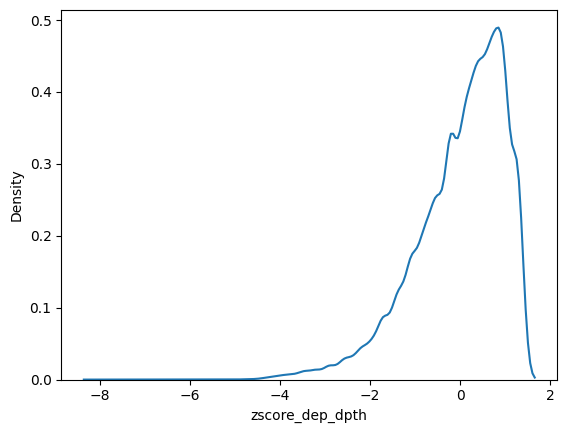

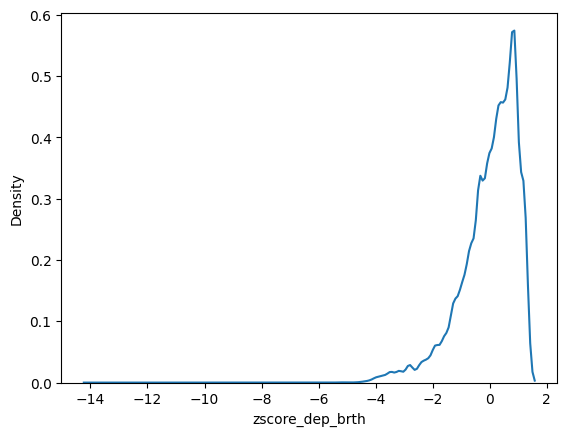

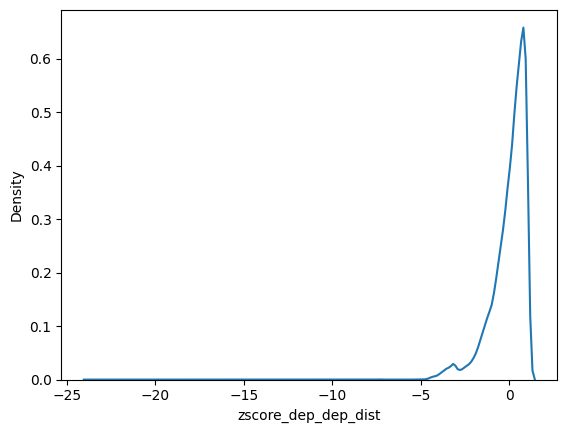

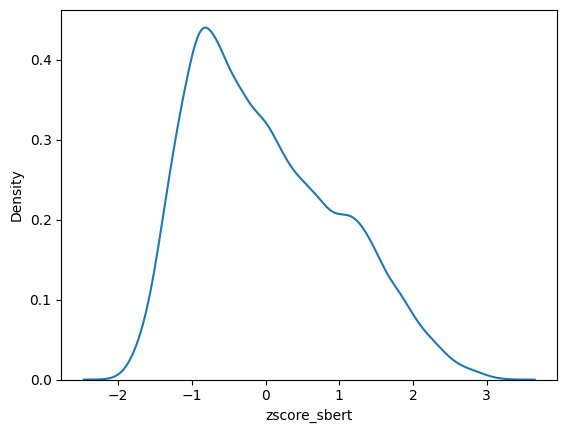

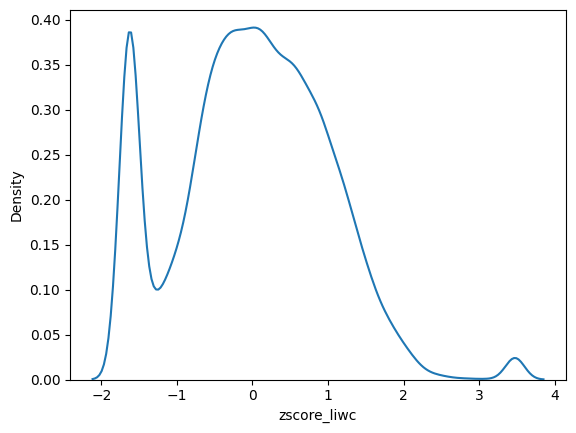

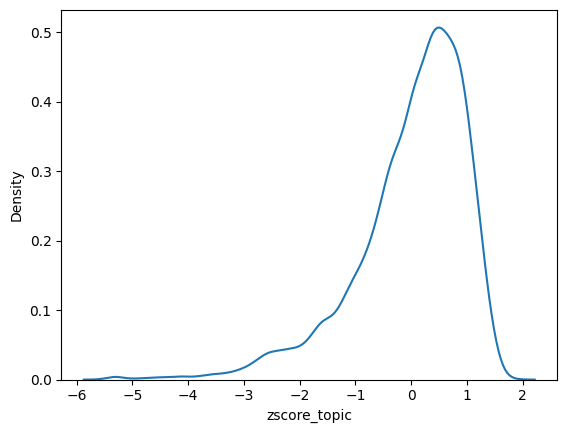

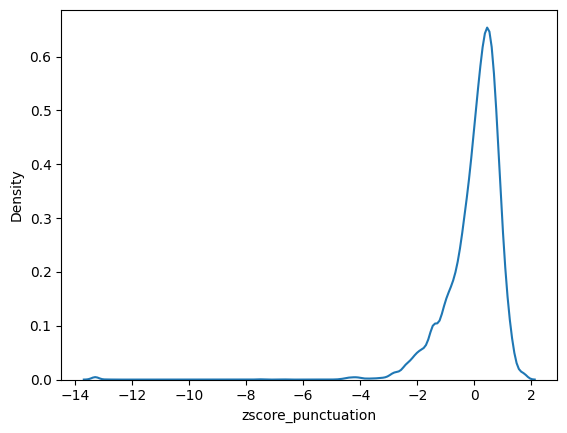

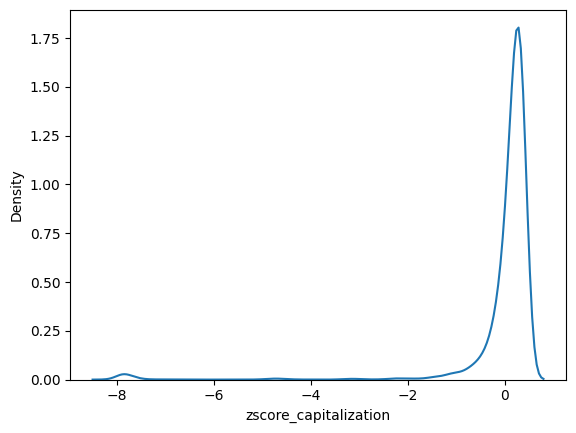

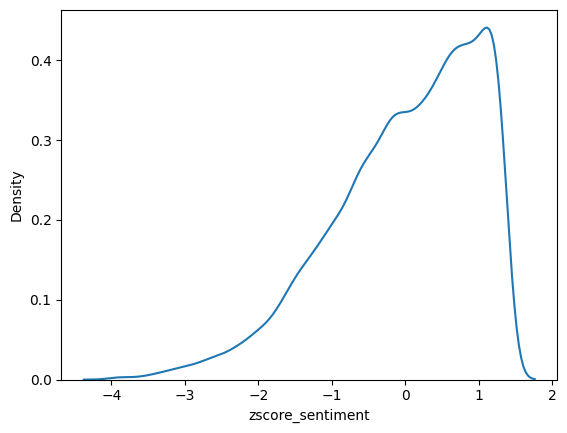

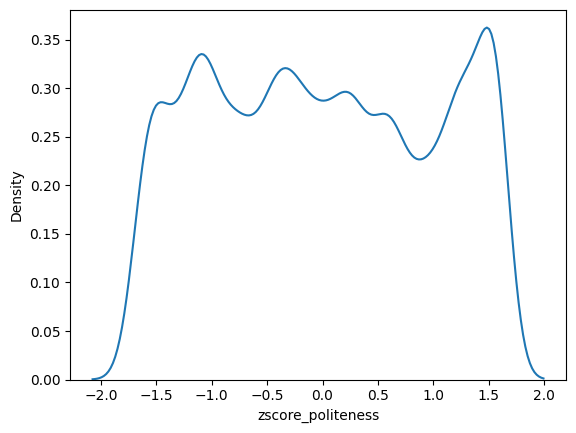

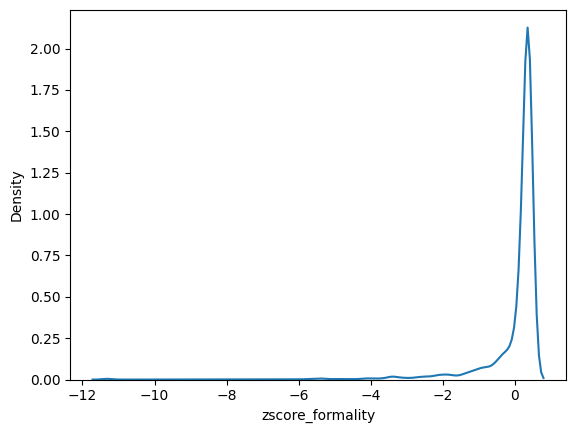

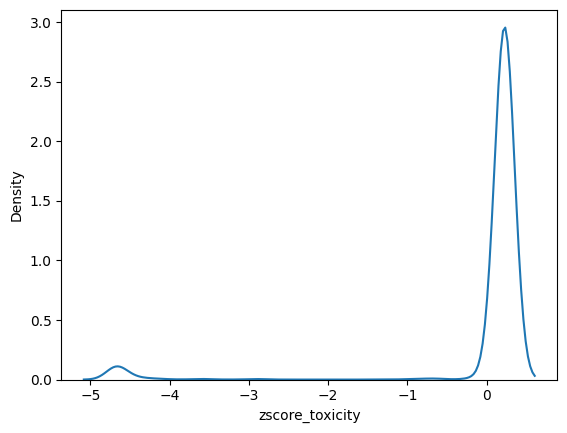

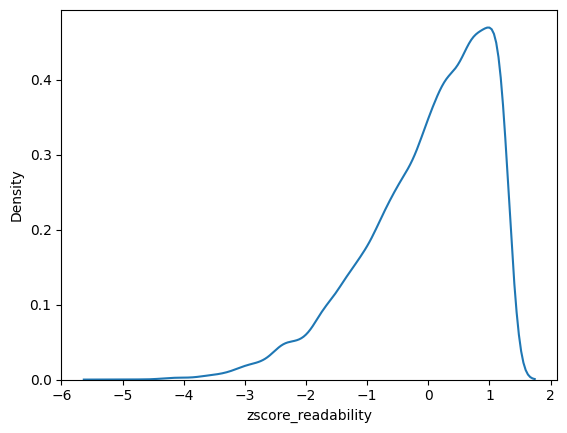

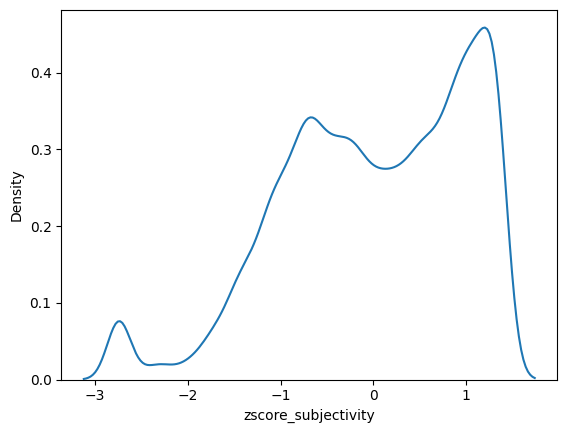

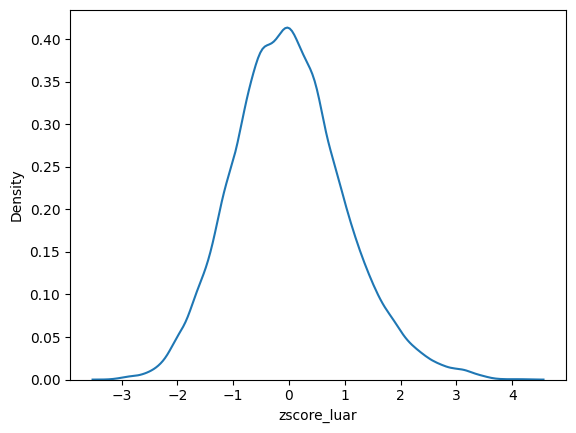

In [21]:
# CREATE NORMALIZED SIMILARITIES BY Z-SCORE
df_zscore = metrics[merge_keys]
for k in all_metrics:
    df_zscore.loc[:,'zscore_'+k] = diff_zscore(metrics['human_'+k], metrics['llm_'+k], all_metrics[k])
    sns.kdeplot(df_zscore['zscore_'+k])
    plt.show()

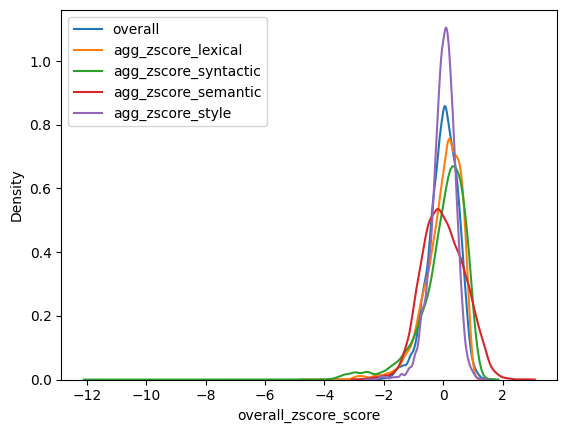

In [22]:
# AGGREGATED SCORES VIA Z-SCORE
df_zscore = aggregate_scores(df_zscore, method = 'zscore')

In [ ]:
df_zscore.to_csv('data/agg_metrics/zscore_normed_metrics.csv', index=None)

pos (63630, 18)
[0.23138853 0.20467897]

sbert (63630, 384)
[0.03283873 0.02992335]

liwc (63630, 70)
[0.44813969 0.0942558 ]

topic (63630, 15)
[0.39602187 0.2630502 ]

punctuation (63630, 33)
[0.67447056 0.13878888]

luar (63630, 512)
[0.08473098 0.0584393 ]



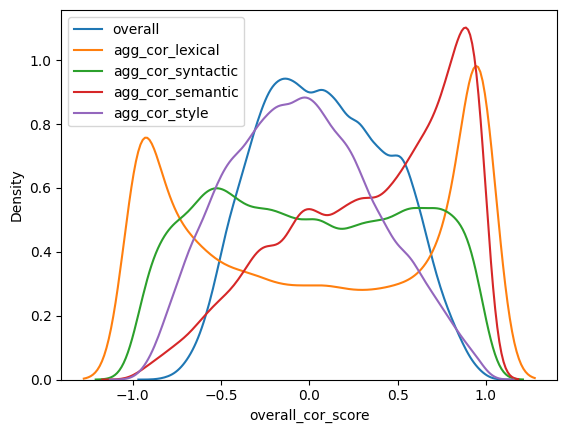

In [23]:
# CREATE NORMALIZED SIMILARITIES BY Z-SCORE
metrics_cor = deepcopy(metrics)
metrics_cor = replace_with_pca(metrics_cor)

#rescale with z-score so differences in scale don't affect the correlation
for k in all_metrics:
    if all_metrics[k] == 'scalar':
        metric = metrics_cor['human_'+k].tolist()
        metric.extend(metrics_cor['llm_'+k].tolist())
        metric = zscore_scale(metric)
        metrics_cor['human_'+k] = metric[:metrics_cor.shape[0]]
        metrics_cor['llm_'+k] = metric[metrics_cor.shape[0]:]
    else:
        human, llm = distribution_scale(metrics_cor['human_'+k], metrics_cor['llm_'+k], scale = zscore_scale)
        metrics_cor['human_'+k] = human 
        metrics_cor['llm_'+k] = llm
        

# AGGREGATED SCORES VIA CORRELATION
df_cor = metrics_cor[merge_keys]
df_cor['agg_cor_lexical'] = metrics_cor.apply(lambda row: dist_row_correlation(row, lexical), axis=1)
df_cor['agg_cor_syntactic'] = metrics_cor.apply(lambda row: dist_row_correlation(row, syntactic), axis=1)
df_cor['agg_cor_semantic'] = metrics_cor.apply(lambda row: dist_row_correlation(row, semantic), axis=1)
df_cor['agg_cor_style'] = metrics_cor.apply(lambda row: dist_row_correlation(row, style), axis=1)
df_cor['overall_cor_score'] = df_cor[[c for c in df_cor.columns 
                                      if c.startswith('agg_cor_')]].apply(lambda x: np.mean(x), axis=1)

sns.kdeplot(df_cor['overall_cor_score'], label='overall')
for k in df_cor.columns:
    if k.startswith('agg_'):
        sns.kdeplot(df_cor[k], label=k)
plt.legend(title= "", loc= "upper left")
plt.show()

In [ ]:
df_cor.to_csv('data/agg_metrics/rowcor_zscore_metrics.csv', index=None)

pos (63630, 18)
[0.23138853 0.20467897]

sbert (63630, 384)
[0.03283872 0.02992334]

liwc (63630, 70)
[0.44813969 0.0942558 ]

topic (63630, 15)
[0.39602187 0.2630502 ]

punctuation (63630, 33)
[0.67447056 0.13878888]

luar (63630, 512)
[0.08473098 0.0584393 ]



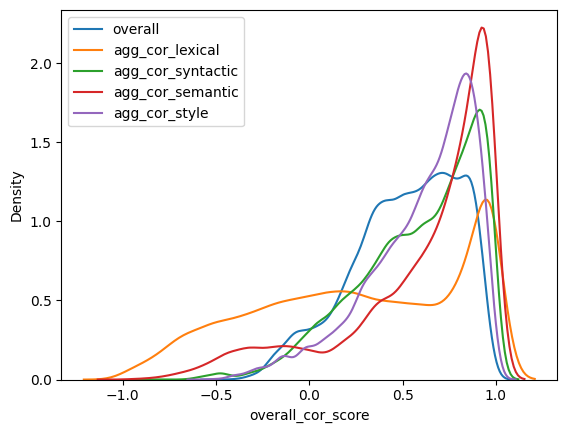

In [24]:
# CREATE NORMALIZED SIMILARITIES BY MIN-MAX
metrics_cor = deepcopy(metrics)
metrics_cor = replace_with_pca(metrics_cor)

#rescale to [0,1] so differences in scale don't affect the correlation
for k in all_metrics:
    if all_metrics[k] == 'scalar':
        metric = metrics_cor['human_'+k].tolist()
        metric.extend(metrics_cor['llm_'+k].tolist())
        metric = min_max_scale(np.array(metric))
        metrics_cor['human_'+k] = metric[:metrics_cor.shape[0]]
        metrics_cor['llm_'+k] = metric[metrics_cor.shape[0]:]
    else:
        human, llm = distribution_scale(metrics_cor['human_'+k], metrics_cor['llm_'+k], scale = min_max_scale)
        metrics_cor['human_'+k] = human 
        metrics_cor['llm_'+k] = llm

# AGGREGATED SCORES VIA CORRELATION
df_cor = metrics_cor[merge_keys]
df_cor['agg_cor_lexical'] = metrics_cor.apply(lambda row: dist_row_correlation(row, lexical), axis=1)
df_cor['agg_cor_syntactic'] = metrics_cor.apply(lambda row: dist_row_correlation(row, syntactic), axis=1)
df_cor['agg_cor_semantic'] = metrics_cor.apply(lambda row: dist_row_correlation(row, semantic), axis=1)
df_cor['agg_cor_style'] = metrics_cor.apply(lambda row: dist_row_correlation(row, style), axis=1)
df_cor['overall_cor_score'] = df_cor[[c for c in df_cor.columns 
                                      if c.startswith('agg_cor_')]].apply(lambda x: np.mean(x), axis=1)

sns.kdeplot(df_cor['overall_cor_score'], label='overall')
for k in df_cor.columns:
    if k.startswith('agg_'):
        sns.kdeplot(df_cor[k], label=k)
plt.legend(title= "", loc= "upper left")
plt.show()

In [ ]:
df_cor.to_csv('data/agg_metrics/rowcor_unit_metrics.csv', index=None)

In [ ]:
# CREATE UNNORMALIZED SIMILARITIES
metrics_cor = deepcopy(metrics)
metrics_cor = replace_with_pca(metrics_cor)

# AGGREGATED SCORES VIA CORRELATION
df_cor = metrics_cor[merge_keys]
df_cor['agg_cor_lexical'] = metrics_cor.apply(lambda row: dist_row_correlation(row, lexical), axis=1)
df_cor['agg_cor_syntactic'] = metrics_cor.apply(lambda row: dist_row_correlation(row, syntactic), axis=1)
df_cor['agg_cor_semantic'] = metrics_cor.apply(lambda row: dist_row_correlation(row, semantic), axis=1)
df_cor['agg_cor_style'] = metrics_cor.apply(lambda row: dist_row_correlation(row, style), axis=1)
df_cor['overall_cor_score'] = df_cor[[c for c in df_cor.columns 
                                      if c.startswith('agg_cor_')]].apply(lambda x: np.mean(x), axis=1)

sns.kdeplot(df_cor['overall_cor_score'], label='overall')
for k in df_cor.columns:
    if k.startswith('agg_'):
        sns.kdeplot(df_cor[k], label=k)
plt.legend(title= "", loc= "upper left")
plt.show()

In [53]:
df_cor.to_csv('data/agg_metrics/rowcor_metrics.csv', index=None)

In [15]:
# from sklearn.cluster import MiniBatchKMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# k = 'sbert'

# # get embeddings
# X = [x for sim in ['human_','llm_'] for x in metrics[sim+k]]

# from datetime import datetime
# print(datetime.now())
# for n_clusters in range(20,101,10):
#     #make clusters
#     clusterer = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
#     cluster_labels = clusterer.fit_predict(X)
#     #silhouette score
#     sil = silhouette_score(X, cluster_labels)
#     print(datetime.now(), n_clusters, sil)

2024-08-12 12:00:31.901132
2024-08-12 12:03:12.451830 20 0.034050639635740274



KeyboardInterrupt



In [27]:
# CREATE COLUMN AGGREGATES WITH CORRELATION
model = []
metric = []
cor = []
for mod in set(metrics.model):
    print(mod)
    sub = metrics[metrics.model == mod]
    for k in all_metrics:
        model.append(mod)
        metric.append(k)
        cor.append(col_diff_correlate(sub['human_'+k], sub['llm_'+k], all_metrics[k]))
col_corr = pd.DataFrame({'model': model, 'metric': metric, 'cor': cor})

wildchat_subset_en_2k_prompting_Qwen2-72B-Instruct


In [51]:
col_corr.groupby('category')['cor'].mean()

category
lexical      0.121752
semantic     0.163339
style        0.083133
syntactic    0.076155
Name: cor, dtype: float64

In [54]:
col_corr.to_csv('data/agg_metrics/cor_metrics.csv', index=None)

In [28]:
metric_category = {}
for k in lexical: metric_category[k] = 'lexical'
for k in syntactic: metric_category[k] = 'syntactic'
for k in semantic: metric_category[k] = 'semantic'
for k in style: metric_category[k] = 'style'
col_corr['category'] = col_corr['metric'].replace(metric_category)
Counter(col_corr['category'])

Counter({'style': 9, 'lexical': 4, 'syntactic': 4, 'semantic': 3})

In [29]:
row_zscore = pd.melt(df_zscore.groupby(['model'])[[c for c in df_zscore 
                                                   if c.startswith('zscore_')]].mean().reset_index(),
                    id_vars = ['model'], value_vars = [c for c in df_zscore if c.startswith('zscore_')],
                    var_name = 'metric', value_name = 'zscore')
row_zscore['metric'] = row_zscore['metric'].str.replace('zscore_','')

In [30]:
row_unit = pd.melt(df_unit.groupby(['model'])[[c for c in df_unit if c.startswith('unit_')]].mean().reset_index(),
                    id_vars = ['model'], value_vars = [c for c in df_unit if c.startswith('unit_')],
                    var_name = 'metric', value_name = 'unit')
row_unit['metric'] = row_unit['metric'].str.replace('unit_','')


In [31]:
df_compare = col_corr.\
merge(row_unit, on=['model','metric'], how='left').\
merge(row_zscore, on=['model','metric'], how='left')

In [36]:
df_compare[['cor','unit','zscore']].corr()

cor      unit    zscore
cor     1.000000 -0.091783 -0.107002
unit   -0.091783  1.000000  0.019401
zscore -0.107002  0.019401  1.000000

In [43]:
df_compare.sort_values('cor')

model          metric  \
15  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...       formality   
2   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...      perplexity   
16  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...        toxicity   
19  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...            luar   
6   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...        dep_brth   
11  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...     punctuation   
12  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...  capitalization   
7   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...    dep_dep_dist   
9   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...            liwc   
18  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...    subjectivity   
4   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...             pos   
0   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...      word_count   
5   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...        dep_dpth   
14  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...      politeness   
1   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...     word_length   
8   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...           sbert   
13  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...       sentiment   
17  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...     readability   
3   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...            typo   
10  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...           topic   

         cor   category      unit        zscore  
15 -0.007780      style  0.965148 -8.623674e-16  
2   0.033664    lexical  0.797327  6.620012e-18  
16  0.042004      style  0.953362 -5.327771e-16  
19  0.045287      style  0.736972 -9.428957e-17  
6   0.046831  syntactic  0.815736  5.837264e-17  
11  0.062358      style  0.905943  2.498709e-15  
12  0.071246      style  0.950844  3.678480e-16  
7   0.072193  syntactic  0.754670  9.402959e-17  
9   0.075285   semantic  0.466193  3.653459e-16  
18  0.076492      style  0.668299 -1.007035e-16  
4   0.085266  syntactic  0.590267 -1.280691e-16  
0   0.098571    lexical  0.712415  1.336699e-17  
5   0.100330  syntactic  0.811078  5.926598e-17  
14  0.112109      style  0.516404  3.212720e-17  
1   0.131914    lexical  0.933160 -1.207618e-16  
8   0.145268   semantic  0.639864 -5.540123e-17  
13  0.148293      style  0.756452  2.920918e-16  
17  0.198192      style  0.801943 -5.559415e-16  
3   0.222859    lexical  0.854084  3.480409e-16  
10  0.269463   semantic  0.801949 -5.930123e-16

<Axes: xlabel='unit', ylabel='cor'>

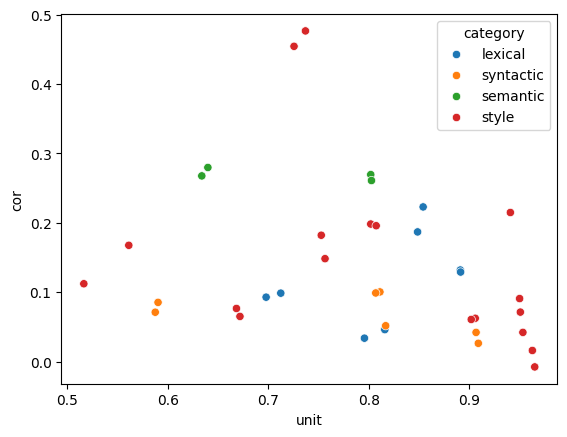

In [38]:
sns.scatterplot(data = df_compare, x = 'unit', y = 'cor', hue='category')

In [47]:
df_cor[[c for c in df_cor.columns if c.startswith('agg_')]].describe()

agg_cor_lexical  agg_cor_syntactic  agg_cor_semantic  agg_cor_style
count     31622.000000       31815.000000      31815.000000   31815.000000
mean          0.274245           0.583732          0.602742       0.603486
std           0.550758           0.318720          0.406327       0.283340
min          -1.000000          -0.820597         -0.980198      -0.545938
25%          -0.161933           0.377852          0.433611       0.438769
50%           0.302604           0.648189          0.754734       0.672223
75%           0.814161           0.853243          0.908789       0.826502
max           0.999999           0.999950          0.999705       0.998969

<Axes: xlabel='zscore', ylabel='cor'>

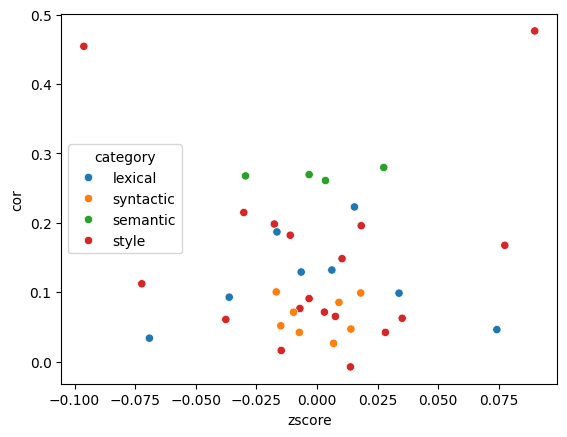

In [39]:
sns.scatterplot(data = df_compare, x = 'zscore', y = 'cor', hue='category')

<Axes: xlabel='zscore', ylabel='unit'>

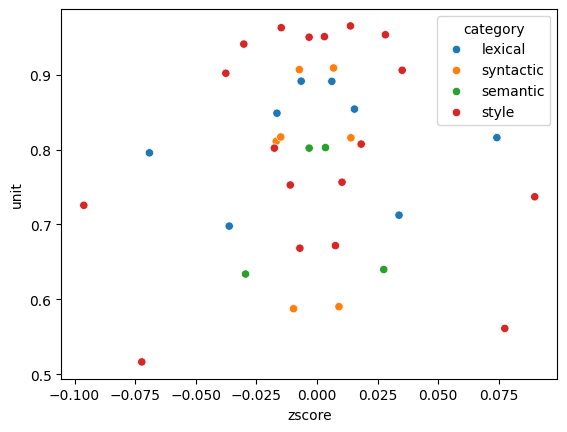

In [40]:
sns.scatterplot(data = df_compare, x = 'zscore', y = 'unit', hue='category')

In [37]:
row_cor = pd.melt(df_cor.groupby(['model'])[[c for c in df_cor 
                                             if c.startswith('agg_')]].mean().reset_index(),
                    id_vars = ['model'], value_vars = [c for c in df_cor if c.startswith('agg_')],
                    var_name = 'category', value_name = 'row_cor')
row_cor['category'] = row_cor['category'].str.replace('agg_cor_','')

In [38]:
df_cat_compare = df_compare.drop('metric', axis=1).groupby(['model','category']).mean().reset_index().\
merge(row_cor, on=['model','category'], how='left')

In [44]:
df_cat_compare

model   category       cor  \
0  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...    lexical  0.121752   
1  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...   semantic  0.163339   
2  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...      style  0.083133   
3  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...  syntactic  0.076155   

       unit        zscore   row_cor  
0  0.824246  6.181651e-17  0.274245  
1  0.636002 -9.435587e-17  0.602742  
2  0.806152  1.160774e-16  0.603486  
3  0.742938  2.089978e-17  0.583732

In [39]:
df_cat_compare.drop(['model','category'], axis=1).corr()

cor      unit    zscore   row_cor
cor      1.000000 -0.632847 -0.766175 -0.146781
unit    -0.632847  1.000000  0.942950 -0.568249
zscore  -0.766175  0.942950  1.000000 -0.267418
row_cor -0.146781 -0.568249 -0.267418  1.000000

<Axes: xlabel='zscore', ylabel='cor'>

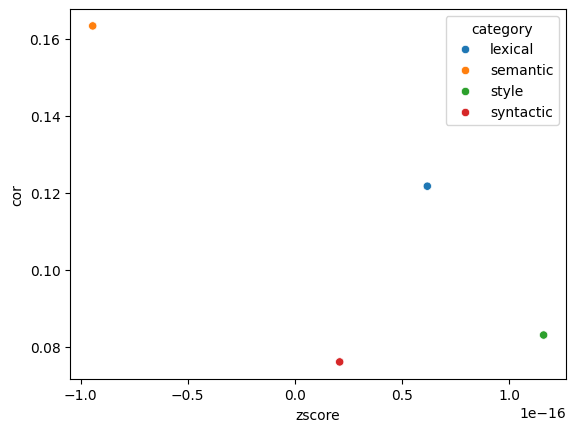

In [40]:
sns.scatterplot(data = df_cat_compare, x = 'zscore', y = 'cor', hue='category')

<Axes: xlabel='unit', ylabel='cor'>

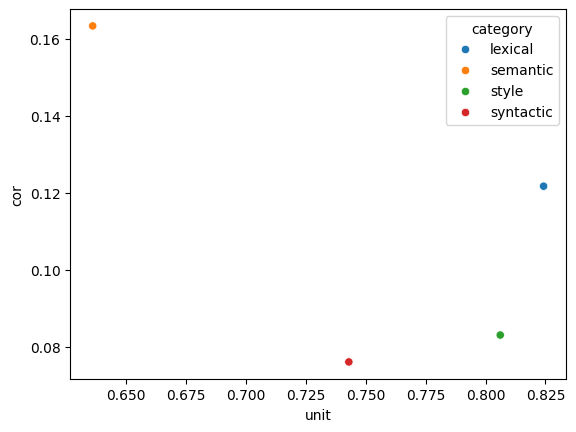

In [41]:
sns.scatterplot(data = df_cat_compare, x = 'unit', y = 'cor', hue='category')

<Axes: xlabel='row_cor', ylabel='cor'>

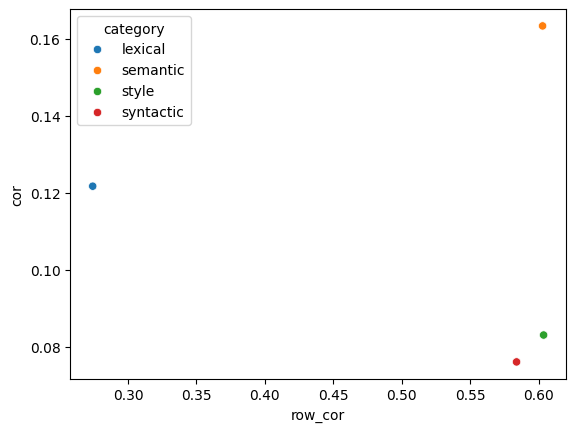

In [42]:
sns.scatterplot(data = df_cat_compare, x = 'row_cor', y = 'cor', hue='category')

In [53]:
df_cat_compare

model   category       cor  \
0  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...    lexical  0.121752   
1  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...   semantic  0.208154   
2  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...      style  0.131054   
3  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...  syntactic  0.064671   

       unit        zscore   row_cor  
0  0.824246  6.181651e-17  0.748217  
1  0.636002 -9.435587e-17  0.352913  
2  0.806152  1.160774e-16 -0.100328  
3  0.781522 -4.576900e-17  0.949158

In [55]:
df_compare.sort_values('cor')

model          metric  \
15  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...       formality   
7   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...    dep_avg_brth   
2   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...      perplexity   
16  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...        toxicity   
6   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...        dep_brth   
11  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...     punctuation   
12  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...  capitalization   
9   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...            liwc   
18  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...    subjectivity   
4   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...             pos   
0   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...      word_count   
5   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...        dep_dpth   
14  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...      politeness   
1   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...     word_length   
13  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...       sentiment   
17  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...     readability   
3   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...            typo   
10  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...           topic   
8   wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...           sbert   
19  wildchat_subset_en_2k_prompting_Qwen2-72B-Inst...            luar   

         cor   category      unit        zscore  
15 -0.007780      style  0.965148 -8.623674e-16  
7   0.026258  syntactic  0.909007 -1.726455e-16  
2   0.033664    lexical  0.797327  6.620012e-18  
16  0.042004      style  0.953362 -5.327771e-16  
6   0.046831  syntactic  0.815736  5.837264e-17  
11  0.062358      style  0.905943  2.498709e-15  
12  0.071246      style  0.950844  3.678480e-16  
9   0.075285   semantic  0.466193  3.653459e-16  
18  0.076492      style  0.668299 -1.007035e-16  
4   0.085266  syntactic  0.590267 -1.280691e-16  
0   0.098571    lexical  0.712415  1.336699e-17  
5   0.100330  syntactic  0.811078  5.926598e-17  
14  0.112109      style  0.516404  3.212720e-17  
1   0.131914    lexical  0.933160 -1.207618e-16  
13  0.148293      style  0.756452  2.920918e-16  
17  0.198192      style  0.801943 -5.559415e-16  
3   0.222859    lexical  0.854084  3.480409e-16  
10  0.269463   semantic  0.801949 -5.930123e-16  
8   0.279715   semantic  0.639864 -5.540123e-17  
19  0.476575      style  0.736972 -9.428957e-17

In [ ]:
metrics.to_json('data/wildchat_subset_en_2k_prompting_all_normalized_metrics.jsonl', orient='records', lines=True)